# Air Quality Analysis 🍃🤔📊📈

## Import modules 📔📚

In [1]:
!python -m pip install -r requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


## 📂 Create Dataset

In [2]:
# to make dataset
# run the file data_generate.py
!python data_generate.py

Synthetic air quality data generated and saved as a CSV file named as Q1_air_quality.csv
Data generation process completed.


## 📌 Main Tasks

### 🔹 Data Preparation

In [3]:
df = pd.read_csv("Q1_air_quality.csv")
df["Date"] = pd.to_datetime(df["Date"])

df.head()

,Record_ID,Country,City,Date,PM2_5,PM10,NO2,SO2,CO,O3,Temperature_C,Humidity,Wind_Speed_kmh,AQI
0,AQ_017517,Mexico,Acapulco,2025-01-25,34.8,78.2,13.5,15.1,3.5,13.9,20.9,34.9,6.7,34.0
1,AQ_009314,France,Nice,2025-03-07,11.7,15.9,9.5,13.6,1.0,12.1,30.2,73.7,4.1,12.0
2,AQ_008591,India,Kolkata,2025-03-06,23.2,34.6,8.4,7.2,0.9,15.3,38.7,63.8,5.7,19.0
3,AQ_001228,Germany,Nuremberg,2025-01-28,41.4,76.9,17.2,5.9,2.3,11.2,16.9,94.3,8.9,36.0
4,AQ_008575,South Korea,Seongnam,2025-01-18,11.2,19.8,7.0,4.6,2.0,13.3,19.7,70.5,3.2,11.0


### 🔹 Data Cleaning

In [4]:
df.isna().sum()

Record_ID           0
Country             0
City                0
Date                0
PM2_5             126
PM10              119
NO2               112
SO2               109
CO                118
O3                117
Temperature_C     129
Humidity          119
Wind_Speed_kmh    111
AQI               109
dtype: int64

In [5]:
df = df.dropna()
df.isna().sum()

Record_ID         0
Country           0
City              0
Date              0
PM2_5             0
PM10              0
NO2               0
SO2               0
CO                0
O3                0
Temperature_C     0
Humidity          0
Wind_Speed_kmh    0
AQI               0
dtype: int64

In [6]:
if df.duplicated().sum() > 0:
    print(f"{df.duplicated().sum()} Duplicate rows found and will be removed.")
    df = df.drop_duplicates()
    print(f"Now there are {df.duplicated().sum()} duplicate rows after removal.")
else:
    print("No duplicate rows found.")

150 Duplicate rows found and will be removed.
Now there are 0 duplicate rows after removal.


### 🔹 Data Analysis

In [7]:
# ===============================
# 1. Basic Info
# ===============================
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

numeric_cols = [
    "PM2_5", "PM10", "NO2", "SO2", "CO", "O3",
    "Temperature_C", "Humidity", "Wind_Speed_kmh", "AQI"
]

print("\nSummary Statistics:\n", df[numeric_cols].describe(include="all"))

missing_percent = (df.isna().sum() / len(df)) * 100
print("\nMissing Values (%):\n", missing_percent)


# ===============================
# 2. AQI Analysis
# ===============================
avg_aqi = df["AQI"].mean()
print("\nOverall Average AQI:", avg_aqi)

aqi_by_country = df.groupby("Country")["AQI"].mean().sort_values(ascending=False)
print("\nAverage AQI by Country:\n", aqi_by_country.head(10))

aqi_by_city = df.groupby("City")["AQI"].mean().sort_values(ascending=False)
print("\nAverage AQI by City:\n", aqi_by_city.head(10))

df["Month"] = pd.to_datetime(df["Date"]).dt.month
aqi_by_month = df.groupby("Month")["AQI"].mean()
print("\nAverage AQI by Month:\n", aqi_by_month)


# ===============================
# 3. Pollutant Analysis
# ===============================
pollutant_means = df[numeric_cols[:-3]].mean().sort_values(ascending=False)
print("\nMean Pollutant Concentrations:\n", pollutant_means)

pollutant_max = df[numeric_cols[:-3]].max().sort_values(ascending=False)
print("\nMaximum Recorded Pollutant Levels:\n", pollutant_max)

# ✅ Fixed correlation calculation
country_means = df.groupby("Country")[numeric_cols].mean()
aqi_means = country_means["AQI"]
pollutant_means_only = country_means.drop(columns="AQI")
pollutant_vs_aqi = pollutant_means_only.corrwith(aqi_means)

print("\nCorrelation of Pollutants with AQI (by Country averages):\n", pollutant_vs_aqi)


# ===============================
# 4. Weather & AQI Relationships
# ===============================
avg_temp_aqi = df.groupby(pd.cut(df["Temperature_C"], bins=5))["AQI"].mean()
print("\nAQI by Temperature Range:\n", avg_temp_aqi)

avg_humidity_aqi = df.groupby(pd.cut(df["Humidity"], bins=5))["AQI"].mean()
print("\nAQI by Humidity Range:\n", avg_humidity_aqi)

avg_wind_aqi = df.groupby(pd.cut(df["Wind_Speed_kmh"], bins=5))["AQI"].mean()
print("\nAQI by Wind Speed Range:\n", avg_wind_aqi)


# ===============================
# 5. Correlations
# ===============================
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:\n", corr_matrix)


# ===============================
# 6. Derived Metrics
# ===============================
# Example: PM2.5 / PM10 ratio
df["PM_Ratio"] = df["PM2_5"] / df["PM10"].replace(0, np.nan)
print("\nAverage PM2.5 to PM10 Ratio:", df["PM_Ratio"].mean())

# Example: Pollution Burden Index (sum of pollutants)
df["Pollution_Burden"] = df[["PM2_5", "PM10", "NO2", "SO2", "CO", "O3"]].sum(axis=1)
print("\nTop 5 Records with Highest Pollution Burden:\n",
      df.nlargest(5, "Pollution_Burden")[["Country", "City", "Pollution_Burden"]])

# Example: Extreme Pollution Flag
df["Extreme_AQI"] = (df["AQI"] > 100).astype(int)
extreme_aqi_rate = df["Extreme_AQI"].mean()
print("\nProportion of Extreme AQI Days (>100):", extreme_aqi_rate)

# Example: Healthy vs Unhealthy Days (AQI threshold 50)
df["Unhealthy_Day"] = (df["AQI"] > 50).astype(int)
unhealthy_rate = df.groupby("Country")["Unhealthy_Day"].mean().sort_values(ascending=False)
print("\nTop 10 Countries by Proportion of Unhealthy Days:\n", unhealthy_rate.head(10))

Dataset Shape: (16849, 14)

Column Data Types:
 Record_ID                 object
Country                   object
City                      object
Date              datetime64[ns]
PM2_5                    float64
PM10                     float64
NO2                      float64
SO2                      float64
CO                       float64
O3                       float64
Temperature_C            float64
Humidity                 float64
Wind_Speed_kmh           float64
AQI                      float64
dtype: object

Missing Values:
 Record_ID         0
Country           0
City              0
Date              0
PM2_5             0
PM10              0
NO2               0
SO2               0
CO                0
O3                0
Temperature_C     0
Humidity          0
Wind_Speed_kmh    0
AQI               0
dtype: int64

Summary Statistics:
               PM2_5          PM10           NO2           SO2            CO  \
count  16849.000000  16849.000000  16849.000000  16849.000000  1

C:\Users\Dell\AppData\Local\Temp\ipykernel_7648\2502245509.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temp_aqi = df.groupby(pd.cut(df["Temperature_C"], bins=5))["AQI"].mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_7648\2502245509.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_humidity_aqi = df.groupby(pd.cut(df["Humidity"], bins=5))["AQI"].mean()
C:\Users\Dell\AppData\Local\Temp\ipykernel_7648\2502245509.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser

### 🔹 Data Visualization

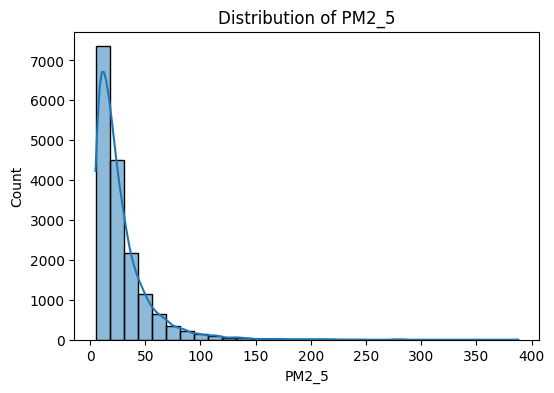

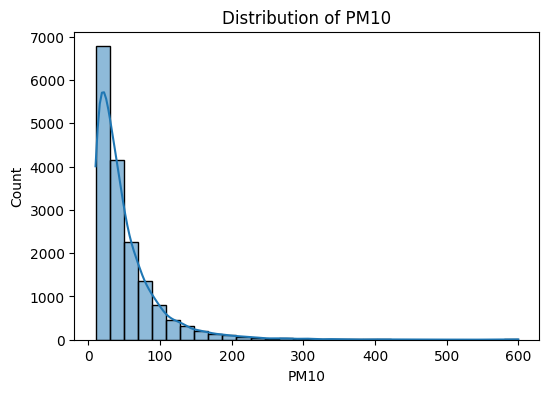

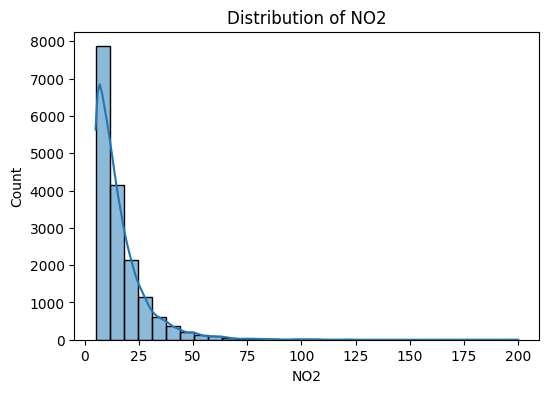

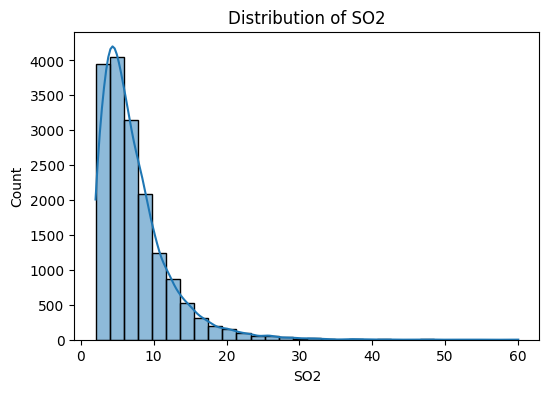

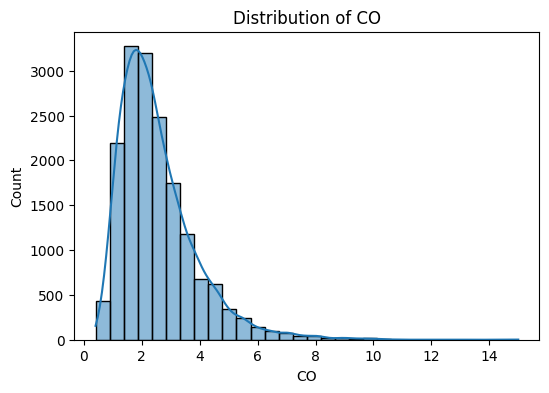

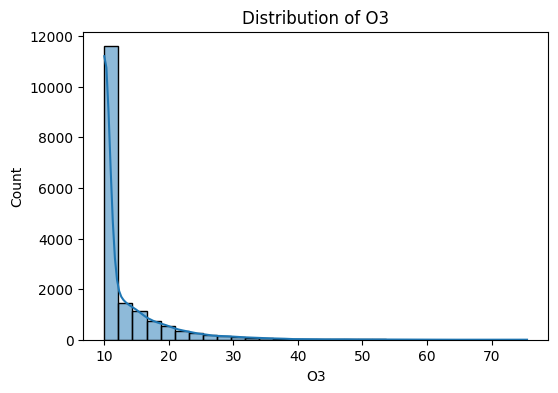

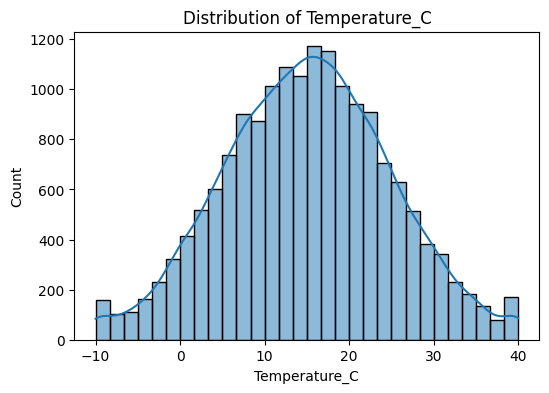

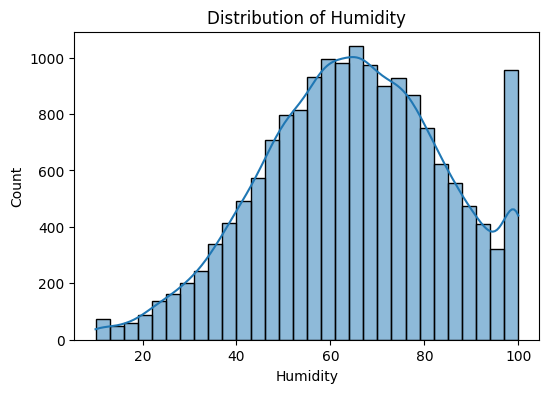

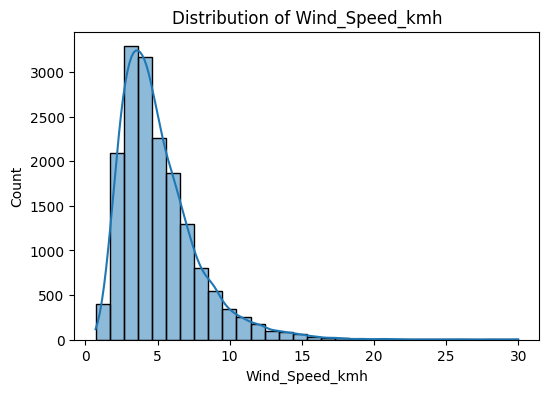

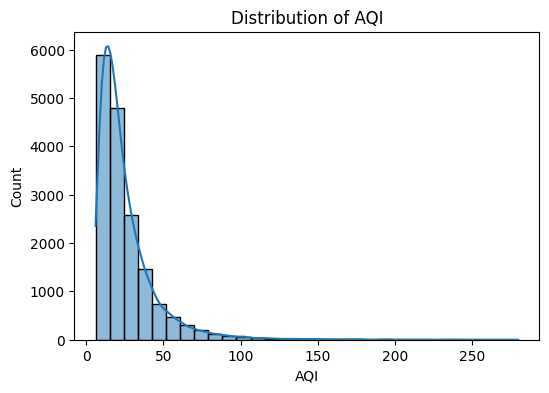

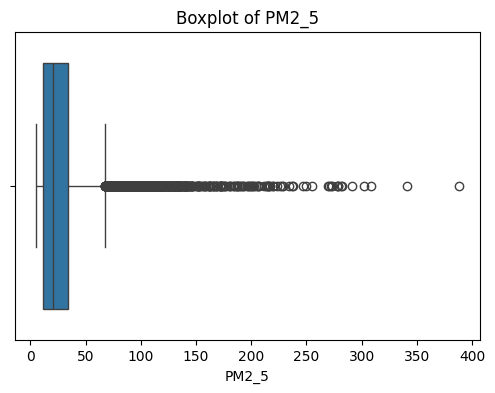

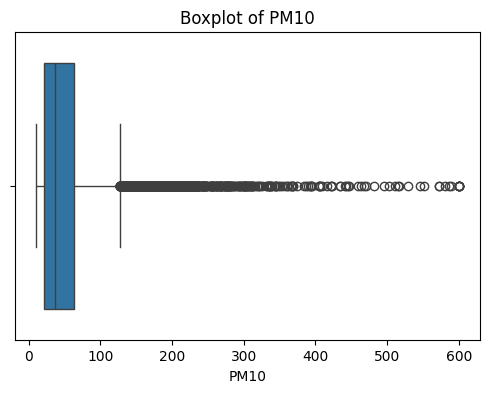

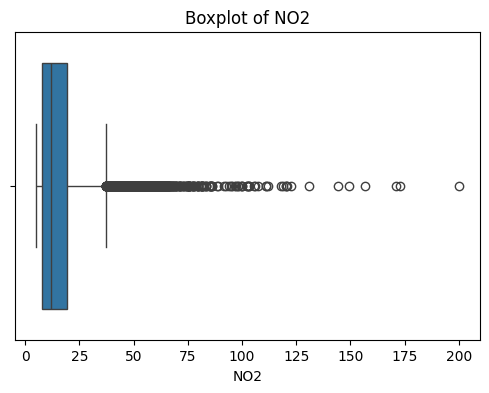

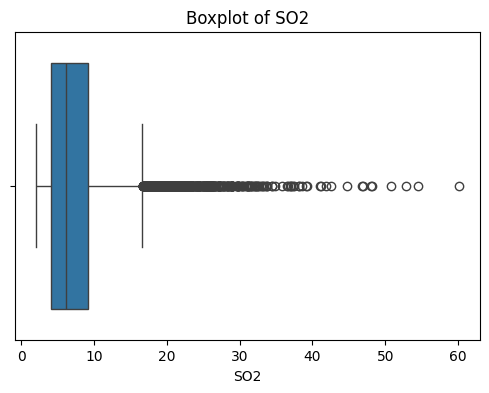

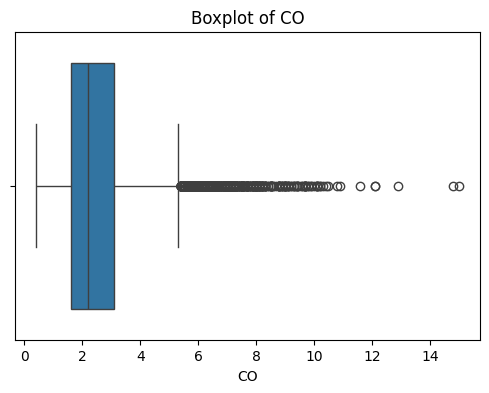

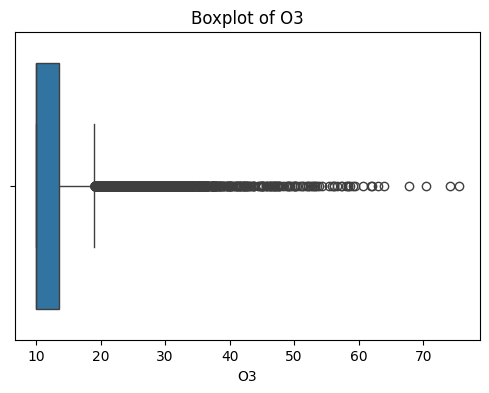

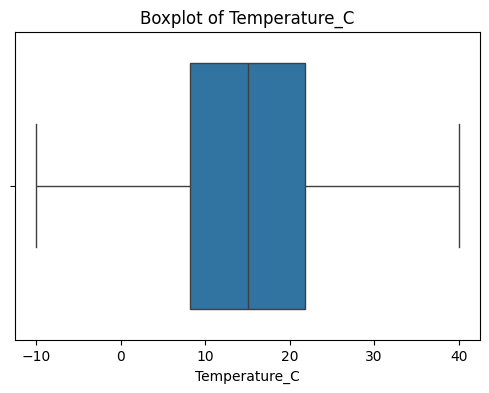

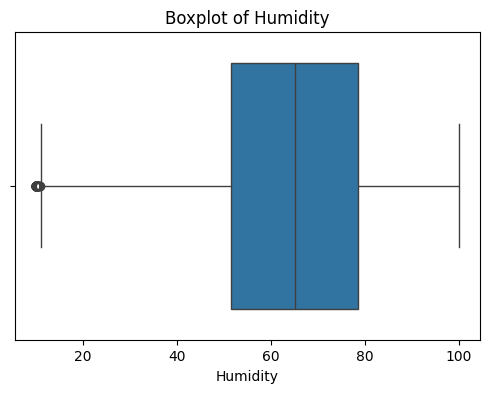

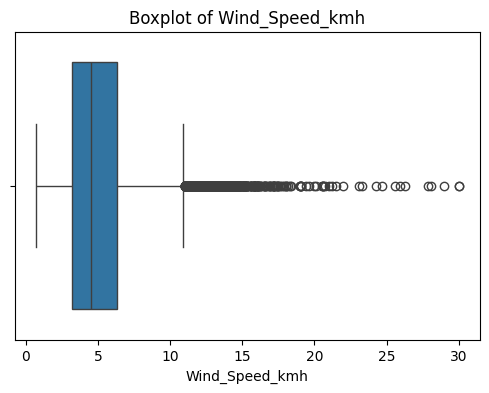

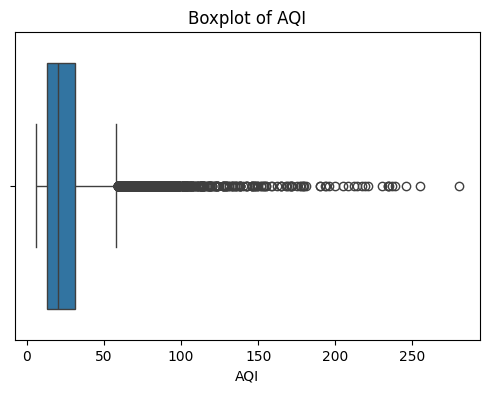

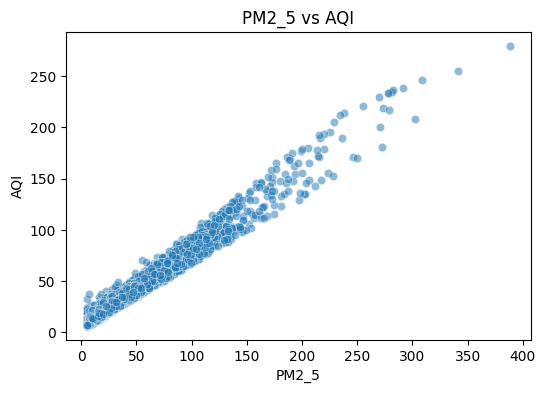

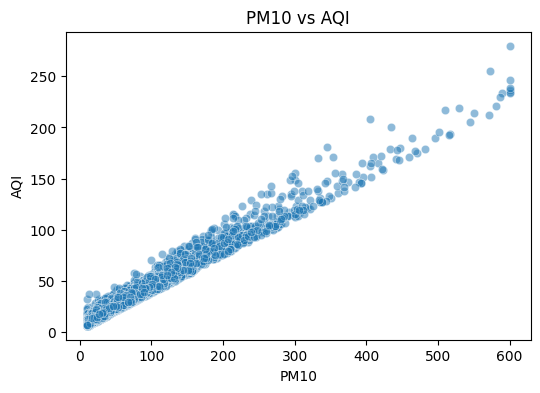

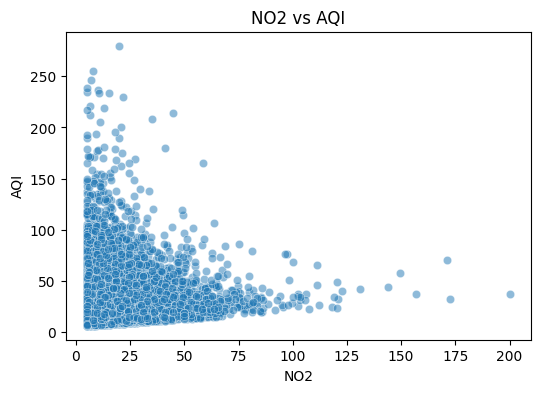

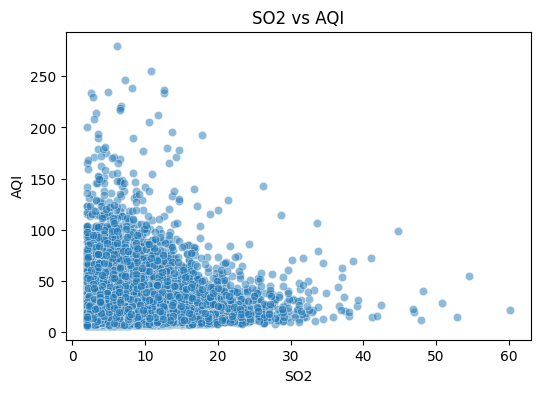

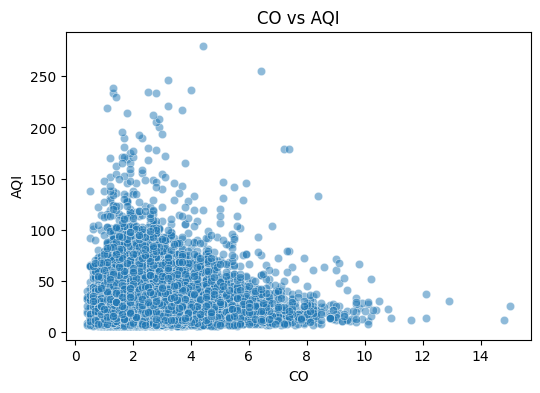

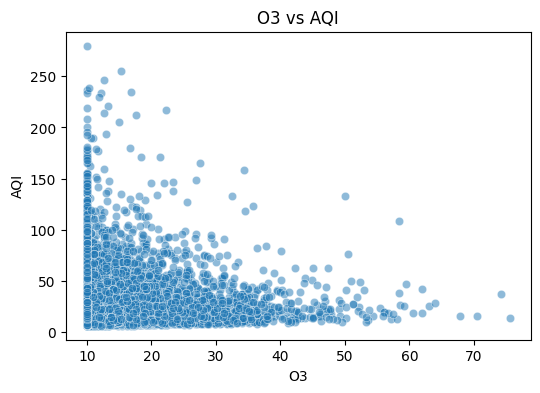

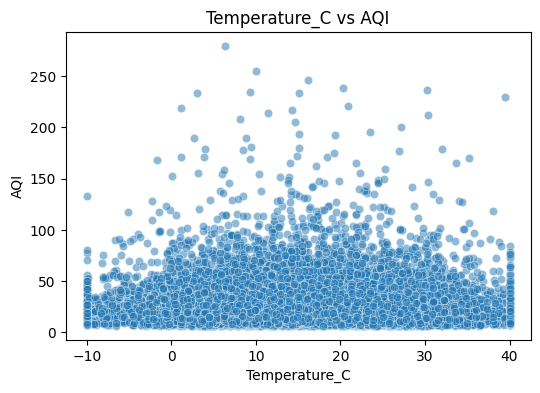

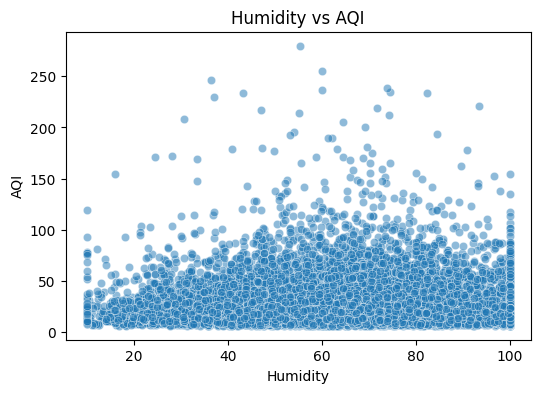

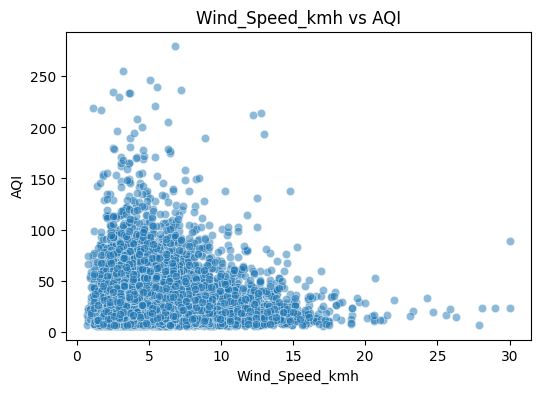

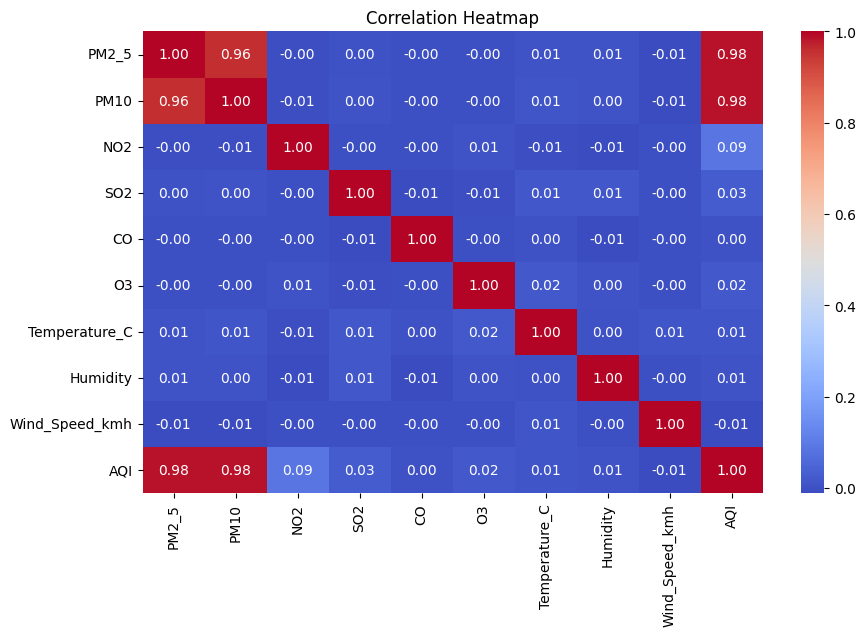

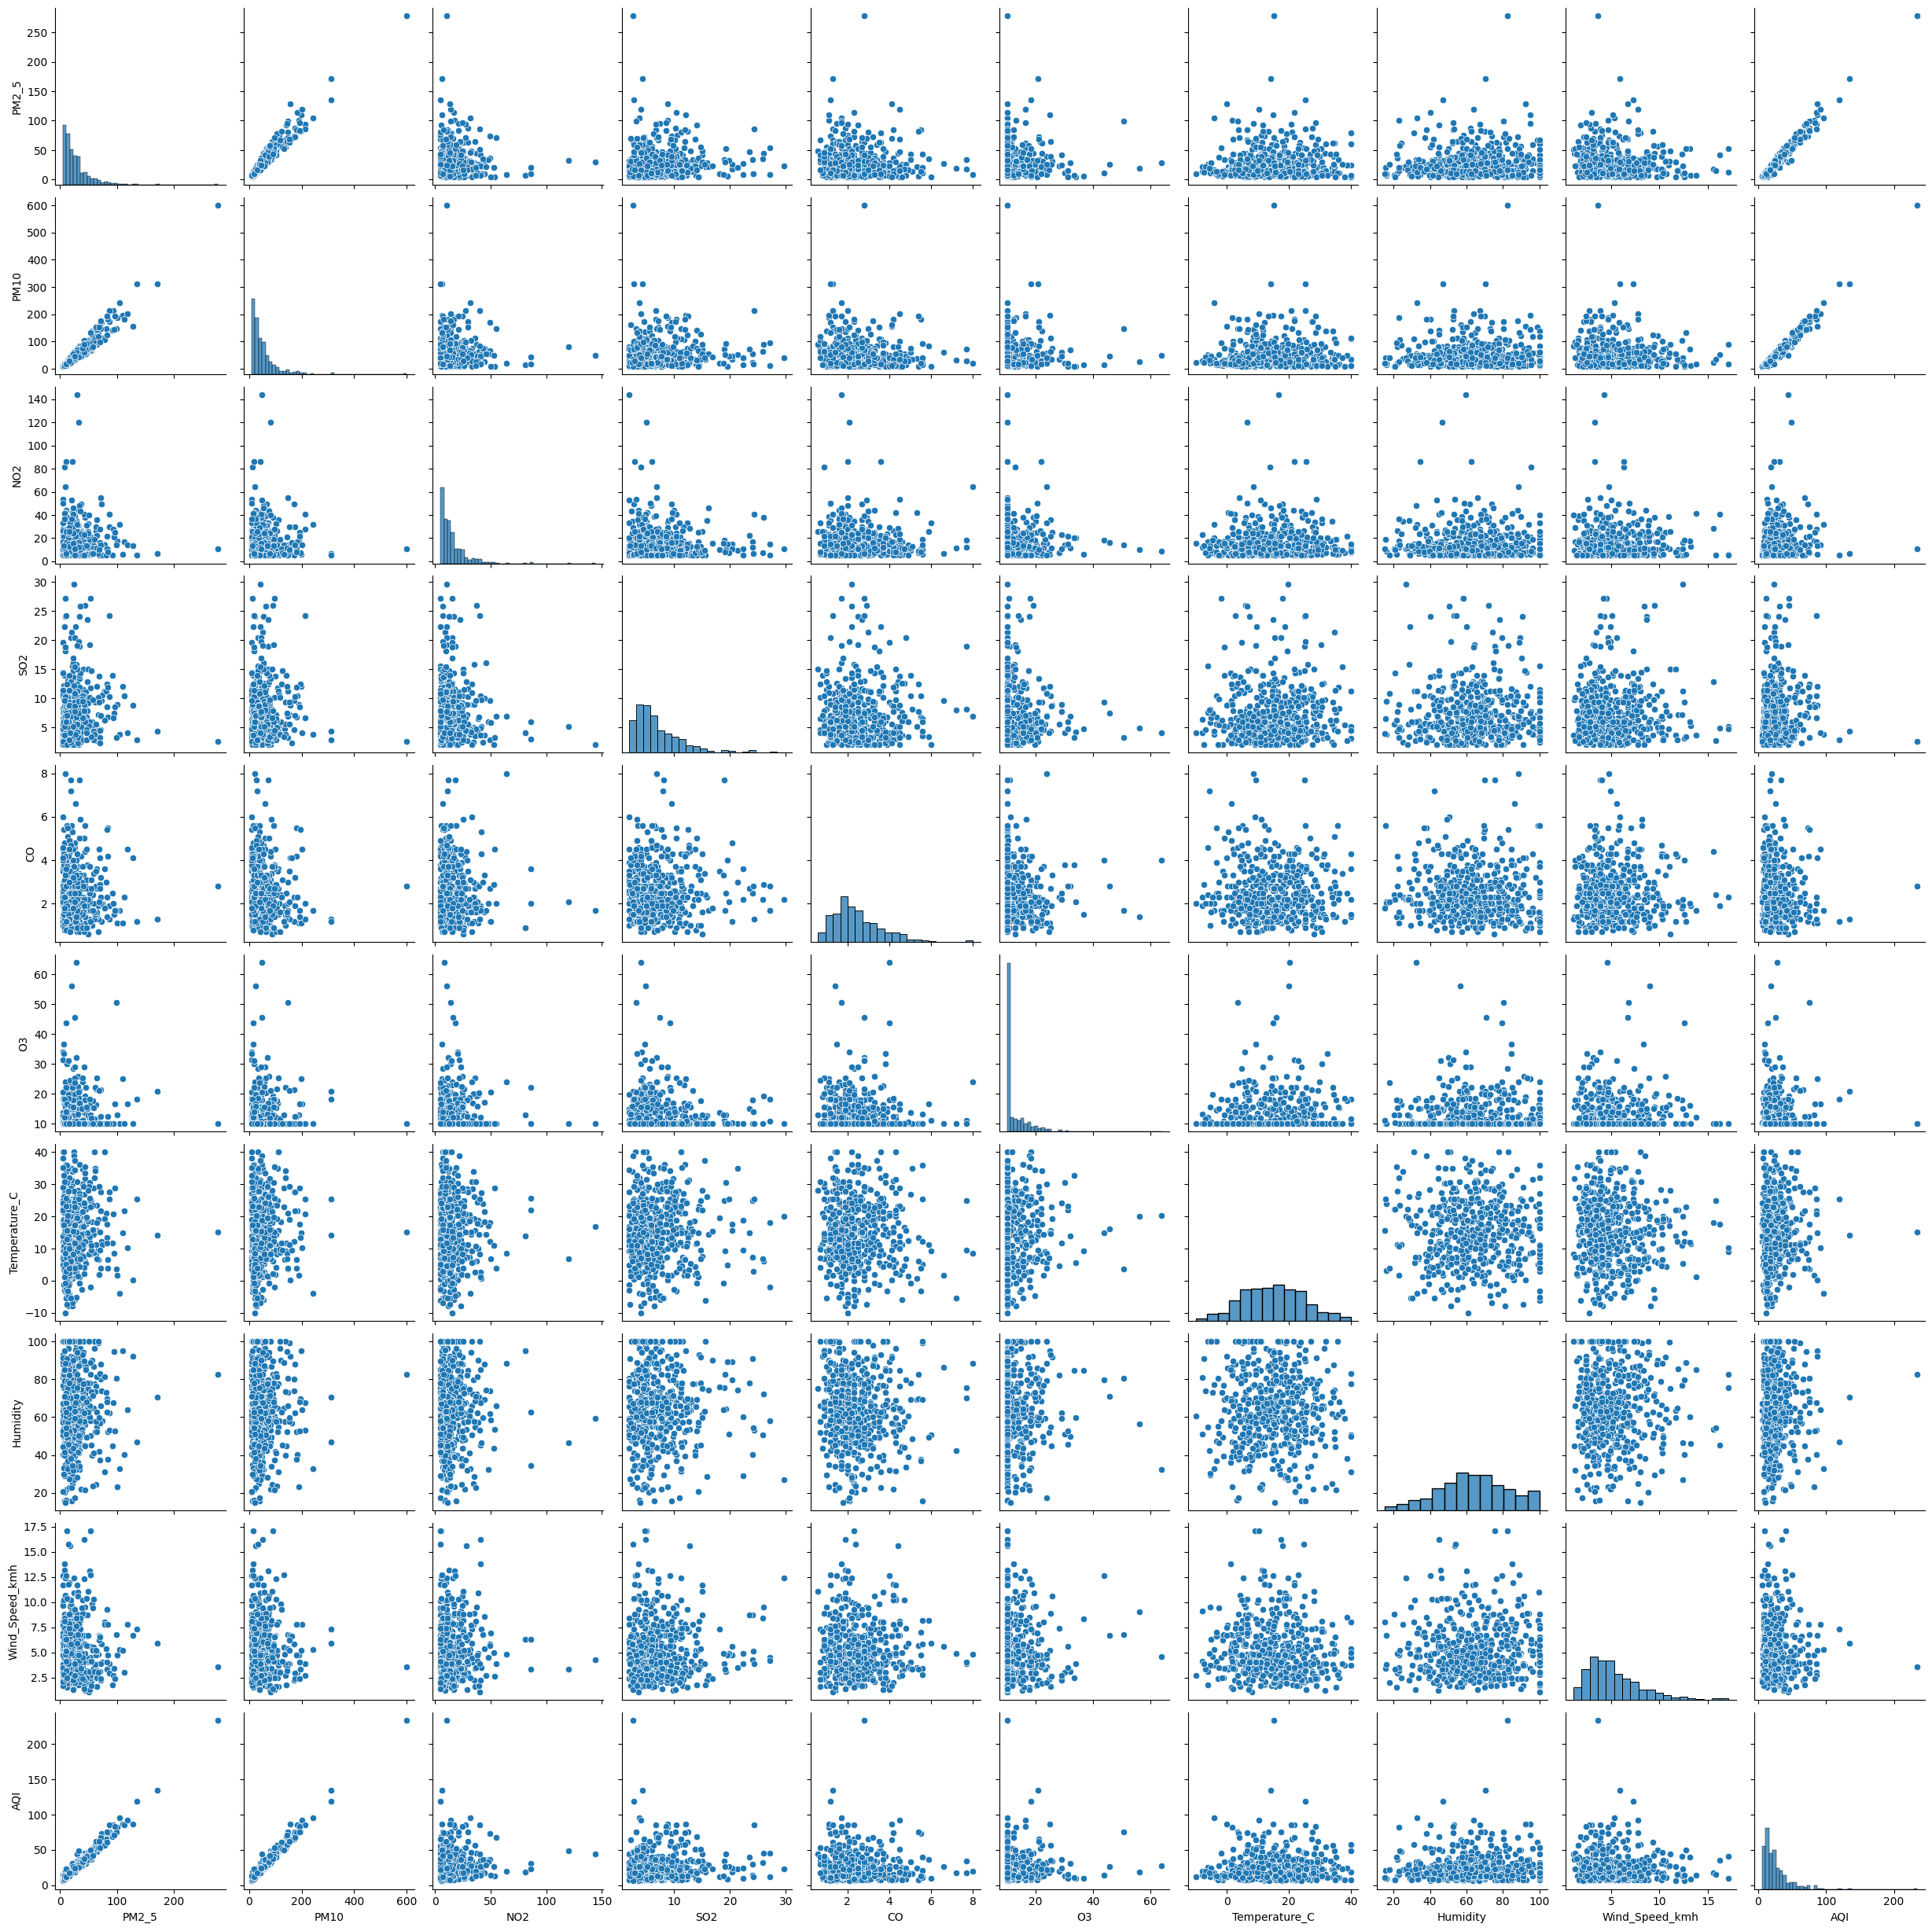

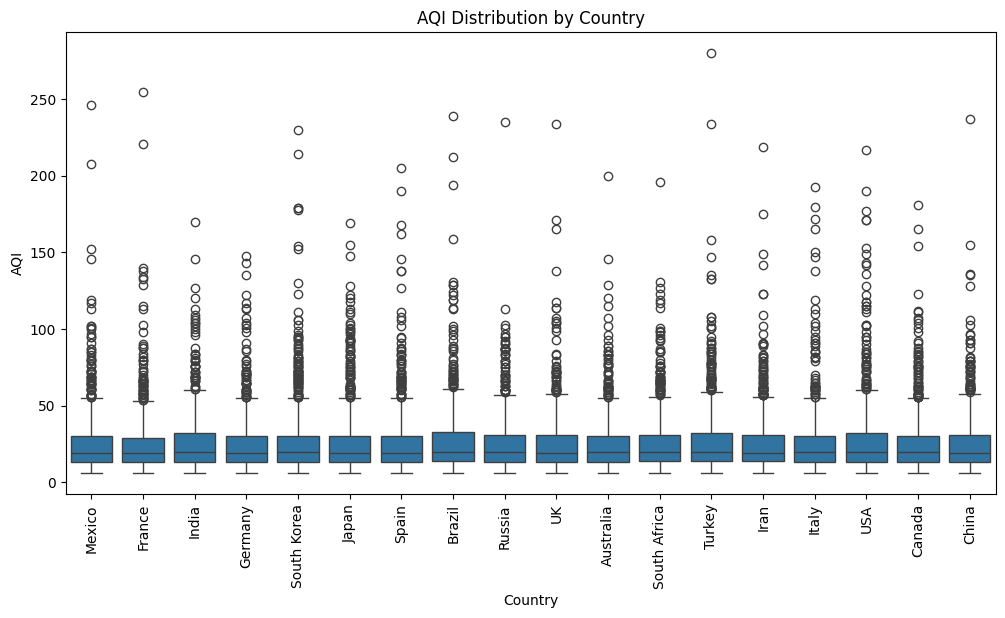

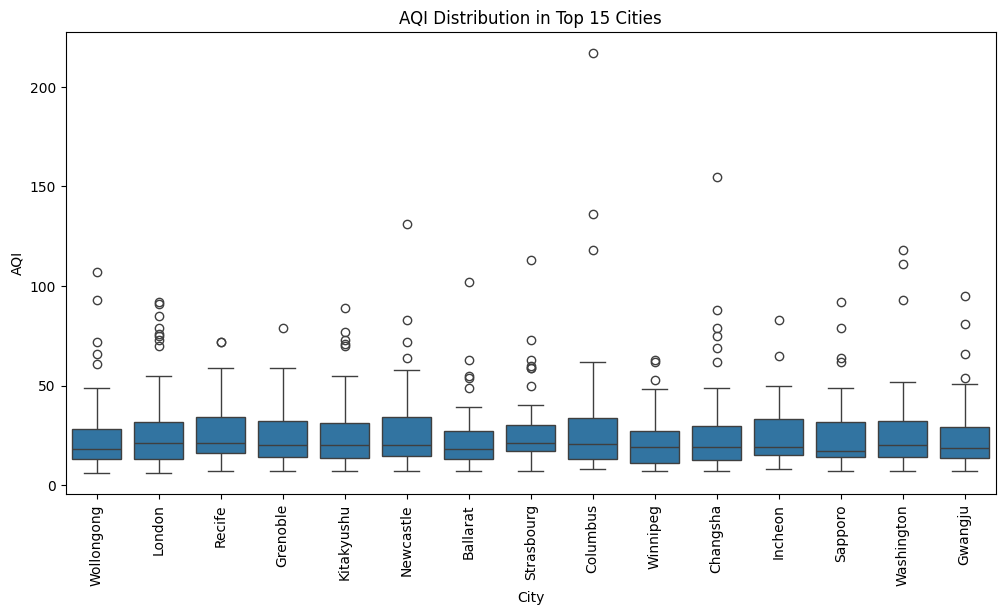

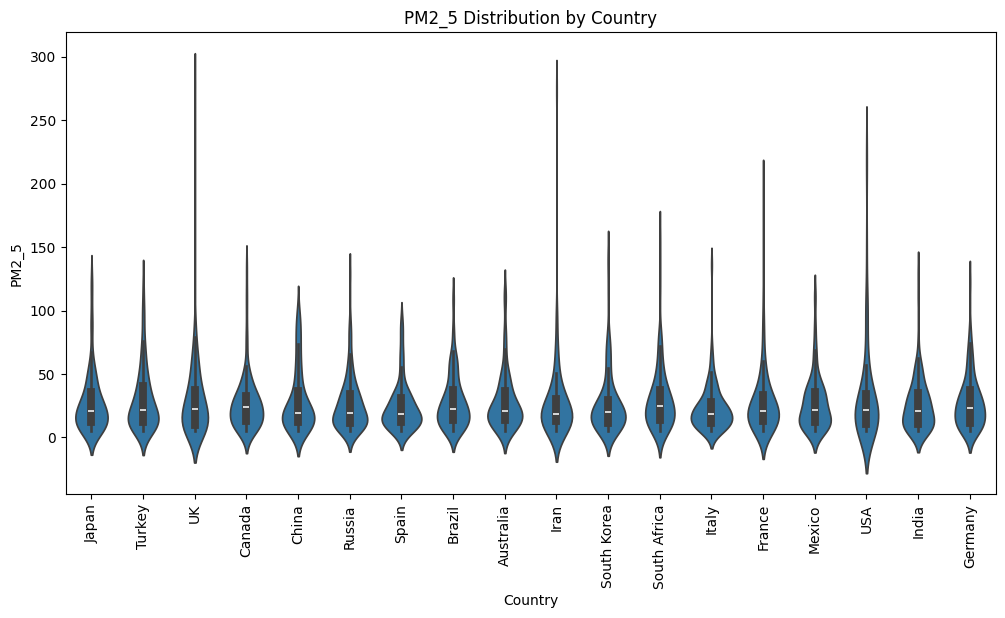

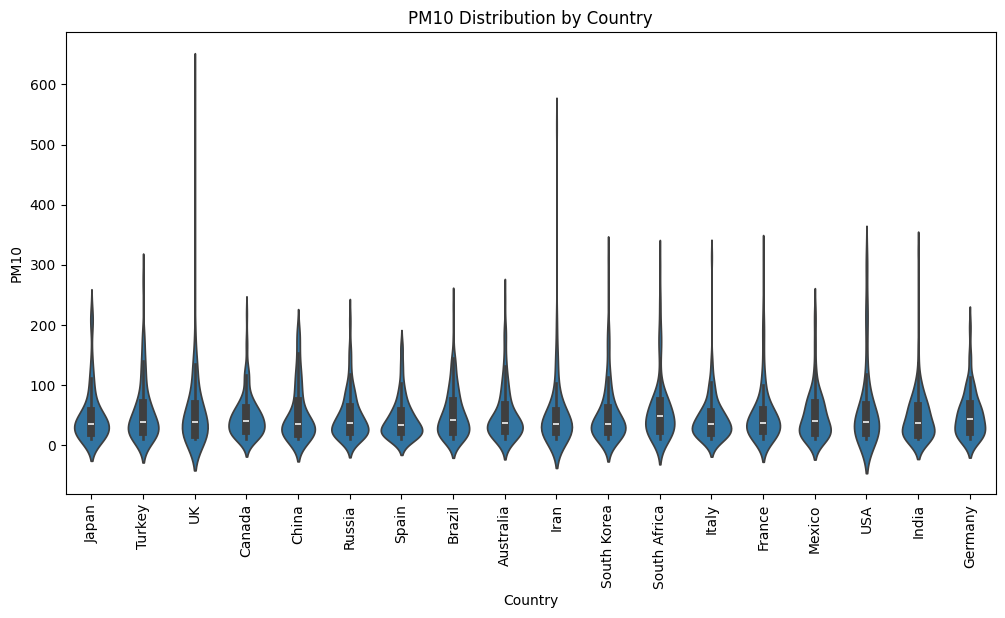

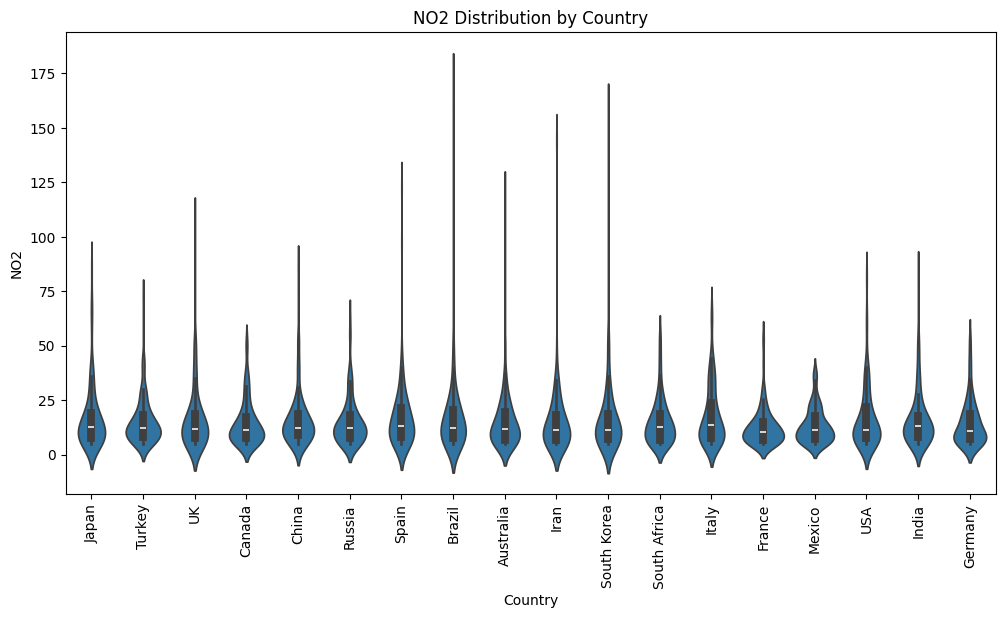

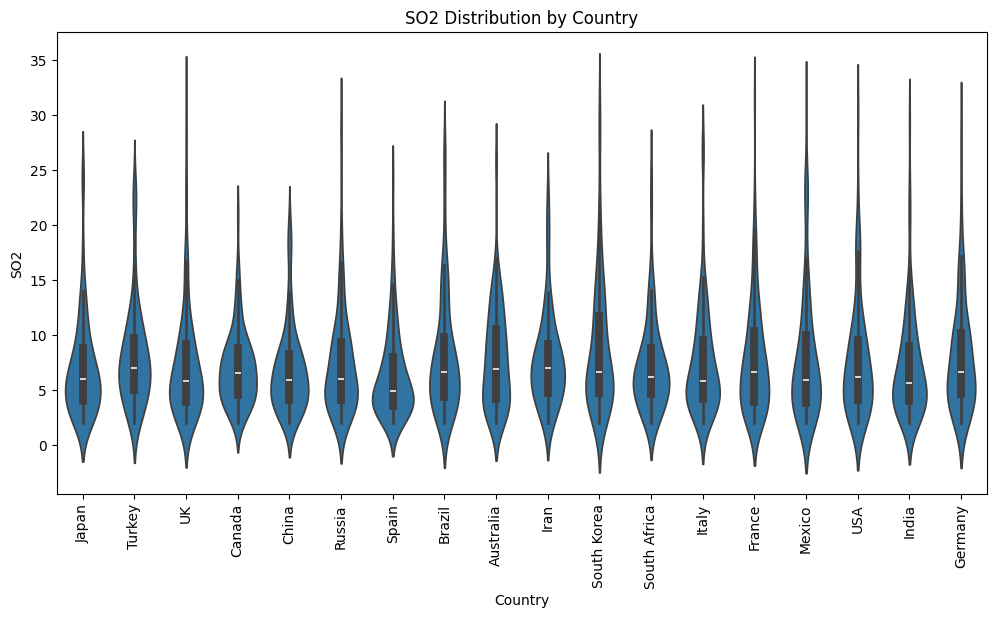

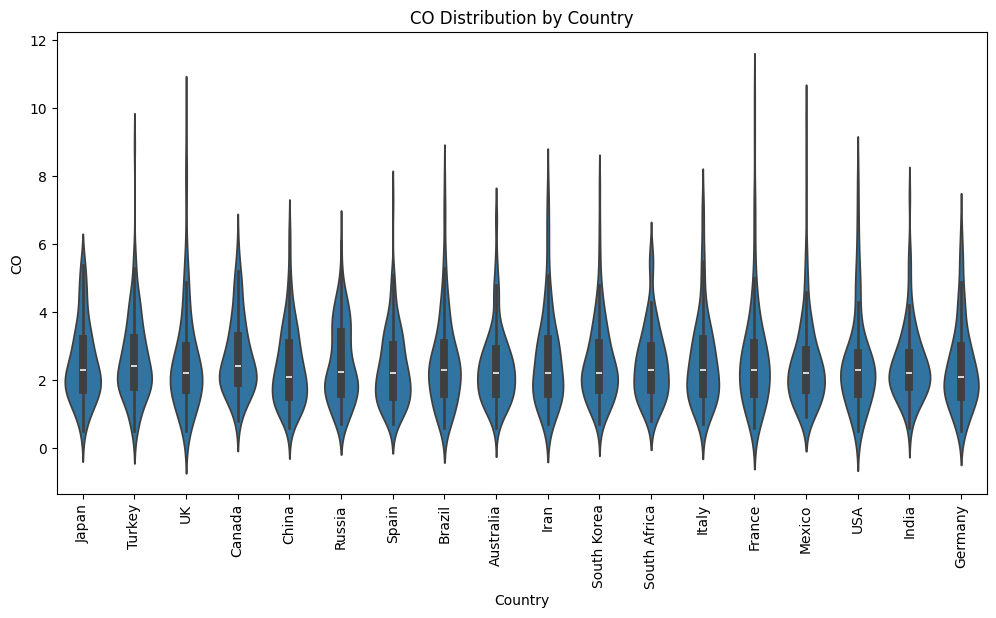

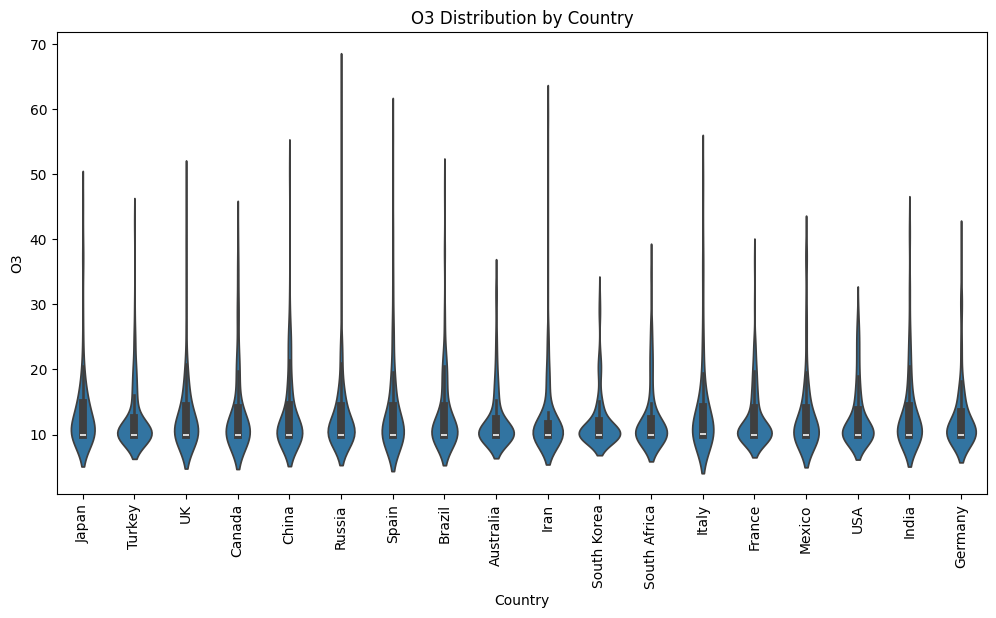

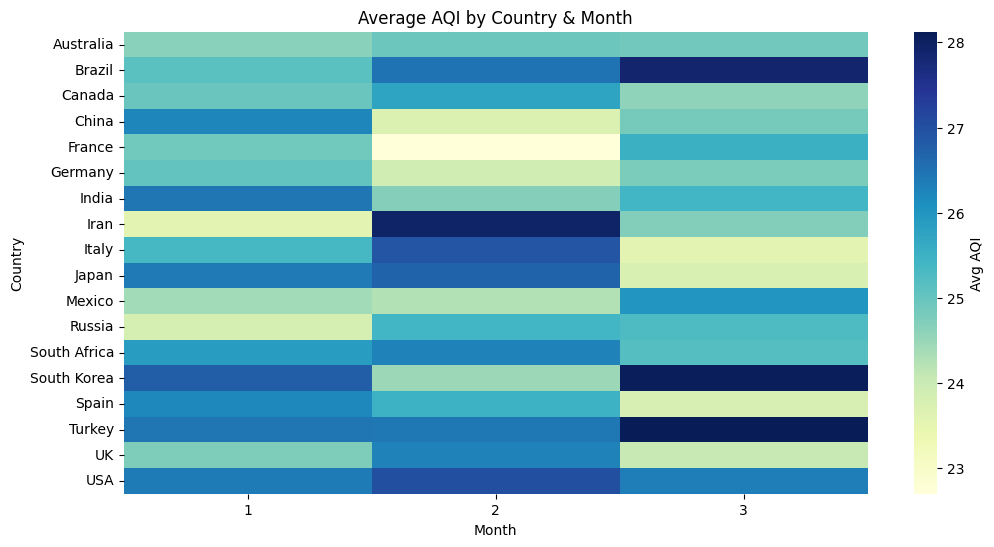

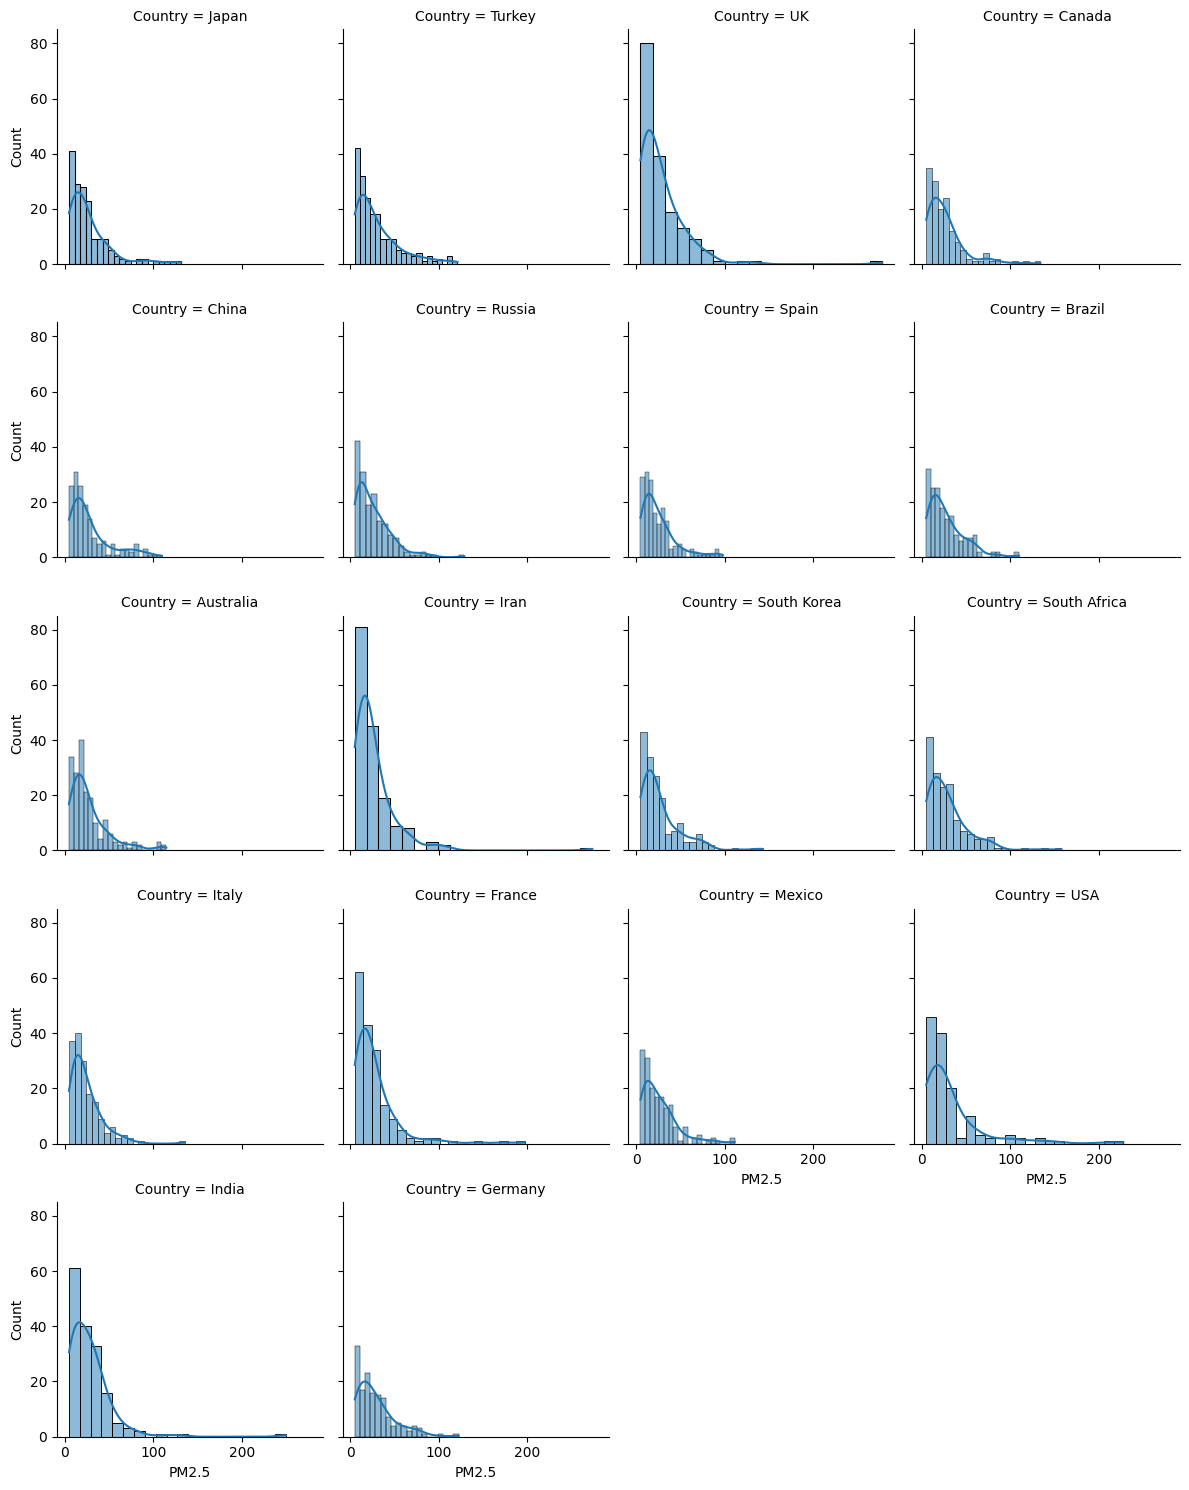

In [8]:
numeric_cols = [
    "PM2_5", "PM10", "NO2", "SO2", "CO", "O3", 
    "Temperature_C", "Humidity", "Wind_Speed_kmh", "AQI"
]

# ===============================
# 1. Univariate Analysis
# ===============================

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# ===============================
# 2. Bivariate Analysis
# ===============================

# Scatterplots (pollutants vs AQI)
for col in numeric_cols[:-1]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y="AQI", alpha=0.5)
    plt.title(f"{col} vs AQI")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (sample for speed)
sns.pairplot(df[numeric_cols].sample(500, random_state=42))
plt.show()


# ===============================
# 3. Categorical Analysis
# ===============================

# AQI distribution by Country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Country", y="AQI")
plt.xticks(rotation=90)
plt.title("AQI Distribution by Country")
plt.show()

# AQI distribution by City (top 15)
top_cities = df["City"].value_counts().head(15).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["City"].isin(top_cities)], x="City", y="AQI")
plt.xticks(rotation=90)
plt.title("AQI Distribution in Top 15 Cities")
plt.show()


# ===============================
# 4. Advanced Visualizations
# ===============================

# Violin plots for pollutants by country (sampled for clarity)
for col in ["PM2_5", "PM10", "NO2", "SO2", "CO", "O3"]:
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df.sample(2000, random_state=42), x="Country", y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col} Distribution by Country")
    plt.show()

# Heatmap: Average AQI by Country & Month
df["Month"] = pd.to_datetime(df["Date"]).dt.month
pivot = df.pivot_table(values="AQI", index="Country", columns="Month", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=False, cmap="YlGnBu", cbar_kws={"label": "Avg AQI"})
plt.title("Average AQI by Country & Month")
plt.show()

# FacetGrid: Distribution of PM2.5 by Country
g = sns.FacetGrid(df.sample(3000, random_state=42), col="Country", col_wrap=4, height=3)
g.map_dataframe(sns.histplot, x="PM2_5", bins=20, kde=True)
g.set_axis_labels("PM2.5", "Count")
plt.show()